<a href="https://colab.research.google.com/github/RafaelAnga/Artificial-Intelligence/blob/main/Supervised-Learning/Classification/XGBoost_Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction Using XGBoost
**Summary of the Code:**

This project uses the XGBoost Classifier to predict whether a bank customer will churn (leave the bank) based on their demographic, financial, and account-related data. The dataset (churn_modelling.csv) includes features such as credit score, geography, gender, age, balance, and more. The model is trained to classify customers as likely to churn or not, using advanced machine learning techniques like k-Fold Cross Validation and Grid Search for hyperparameter optimization.

**Business Applications:**

This model can be applied in various industries, particularly in banking and financial services, to:

* Customer Retention: Identify customers at risk of leaving and take proactive measures to retain them.
* Targeted Marketing: Design personalized offers or campaigns for high-risk customers.
* Resource Allocation: Focus retention efforts on customers with high lifetime value.
* Churn Analysis: Understand the factors contributing to customer churn and improve services accordingly

## Import Libraries

In [1]:
# Import essential libraries for data manipulation, visualization, and numerical operations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Install specific versions of XGBoost and scikit-learn for compatibility

In [2]:
!pip install xgboost==2.1.2
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
# Mount Google Drive to access data (Colab-specific)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# List directory contents to verify dataset availability
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
 # Library necesary to access the folder route
import os
os.chdir('/content/drive/MyDrive/Machine Learning/Classification Templates/DataSet')

#Lists the available directories
os.listdir()

['Social_Network_Ads.csv', 'churn_modelling.csv']

In [6]:
# Load the breast cancer dataset and separate features (X) and target variable (y)
dataset = pd.read_csv('churn_modelling.csv')

### Checking missing data

In [7]:
# Display first few rows of dataset to inspect data
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Check for any missing values in the dataset
dataset.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


### Handling categorical variables

CustomerId and Surname columns

In [9]:
# Data Preprocessing: Remove non-predictive columns
dataset.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Handle categorical variable: Geography

In [11]:
# Check unique values
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
# Create dummy variables
geography_dummies = pd.get_dummies(dataset['Geography'], drop_first=True)

In [13]:
geography_dummies

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [14]:
# Create dummies
geography_dummies = pd.get_dummies(dataset['Geography'], drop_first = True)

In [15]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Add dummies to dataset
dataset = pd.concat([geography_dummies, dataset], axis = 1)

In [17]:
dataset.head()

,Germany,Spain,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,False,True,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,False,False,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,False,False,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,False,True,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# Remove original Geography column
dataset.drop('Geography', axis=1, inplace=True)

## Handle categorical variable: Gender

In [19]:
# Check unique values
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
# Convert Gender to binary (0 for Female, 1 for Male)
dataset['Gender'] = dataset['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [21]:
dataset.head(10)

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,619,0,42,2,0.00,1,1,1,101348.88,1
1,False,True,608,0,41,1,83807.86,1,0,1,112542.58,0
2,False,False,502,0,42,8,159660.80,3,1,0,113931.57,1
3,False,False,699,0,39,1,0.00,2,0,0,93826.63,0
4,False,True,850,0,43,2,125510.82,1,1,1,79084.10,0
5,False,True,645,1,44,8,113755.78,2,1,0,149756.71,1
6,False,False,822,1,50,7,0.00,2,1,1,10062.80,0
7,True,False,376,0,29,4,115046.74,4,1,0,119346.88,1
8,False,False,501,1,44,4,142051.07,2,0,1,74940.50,0
9,False,False,684,1,27,2,134603.88,1,1,1,71725.73,0


### Creating the Training Set and the Test Set

Getting the Training Set and the Test Set

In [22]:
# Split data into features (X) and target variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [23]:
# Split data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building and training the model

### Building the model

In [24]:
# Initialize XGBoost classifier with specific parameters
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth = 3, learning_rate = 0.2, n_estimators = 100, subsample = 1.0)

### Training the model

In [25]:
# Train the model
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Inference

In [26]:
# Make predictions on test set
y_pred = classifier.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

### Predicting the result of a single observation

Sample use: Using the models parameters (variables) what does the model say about the customer leaving?

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

In [29]:
result = classifier.predict([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0]])

In [34]:
if result == 1:
  print("Customer will leave the bank")
else:
  print("Customer will not leave the bank")

Customer will not leave the bank


## Part 3: Evaluating the model

### Making the Confusion Matrix

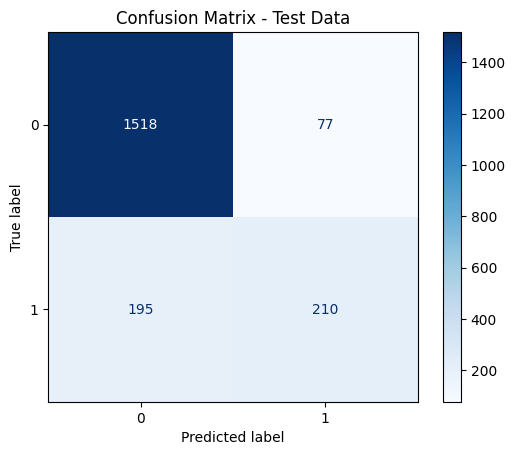

Accuracy score 86.4%


In [31]:
# Model Evaluation: Create and display confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Data")
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy score {ac*100}%")

### k-Fold Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
accuracies = cross_val_score(estimator=classifier,
                            X=X,
                            y=y,
                            scoring='accuracy',
                            cv=10)


print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 86.50 %
Standard Deviation: 0.95 %


In [33]:
# Define parameter grid for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier

# Define the model
classifier = XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [3, 5, 7],              # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'subsample': [0.8, 1.0],             # Fraction of samples used for fitting
    'colsample_bytree': [0.8, 1.0],      # Fraction of features used for fitting
}

# Use accuracy as the scoring metric
scorer = "accuracy"

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,            # Number of cross-validation folds
    verbose=2,       # For detailed output
    n_jobs=-1        # Use all available CPUs
)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and the best accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy Score: 0.8671


# Technical Summary of the Project:
**Data Preprocessing:**
1.  Removed non-predictive columns (CustomerId, Surname).

2. Handled categorical variables:
* Converted Gender to binary (0 for Female, 1 for Male).
* One-hot encoded Geography and dropped the original column.
3. Split the dataset into training (80%) and testing (20%) sets.
**Model Building:**
1. Used XGBoost Classifier with parameters like max_depth=3, learning_rate=0.2, and n_estimators=100.
2. Trained the model on the training set and made predictions on the test set.
**Model Evaluation:**
1. Evaluated the model using a Confusion Matrix and calculated the accuracy score.
2. Performed k-Fold Cross Validation to ensure the model's robustness and stability.
**Hyperparameter Tuning:**
1. Used Grid Search to optimize hyperparameters such as n_estimators, max_depth, learning_rate, subsample, and colsample_bytree.
2. Identified the best parameters and corresponding accuracy score.
**Prediction:**
1. Predicted churn for a single customer based on their profile (e.g., age, balance, etc.).